In [1]:
# Import packages and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm

cancer = pd.read_csv('WisconsinBreastCancerDatabase.csv').dropna()
cancer = cancer.replace(to_replace=['M', 'B'], value=[int(1), int(0)])
cancer.shape

C:\Users\shevy\AppData\Local\Temp\ipykernel_12648\3922602720.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cancer = cancer.replace(to_replace=['M', 'B'], value=[int(1), int(0)])


(569, 32)

The following Participation Activities may have slightly different values due to randomization. Students are encouraged to explore the analysis by changing the seed value, but should answer the PA questions using `seed=123`.

In [2]:
seed = 123

In [3]:
# Define input and output features
# Remove ID and diagnosis from X
X = cancer.iloc[:, 2:33]
y = cancer[['Diagnosis']]

# Create training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=seed
)

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
y_train.describe()

,Diagnosis
count,398.000000
mean,0.361809
std,0.481129
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [5]:
y_test.describe()

,Diagnosis
count,171.000000
mean,0.397661
std,0.490852
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [6]:
# Fit k-nearest neighbors with k=3
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train_scaled, np.ravel(y_train))

# Fit k-nearest neighbors with k=7
knn7 = KNeighborsClassifier(n_neighbors=7)
knn7.fit(X_train_scaled, np.ravel(y_train))

# Fit k-nearest neighbors with k=11
knn11 = KNeighborsClassifier(n_neighbors=11)
knn11.fit(X_train_scaled, np.ravel(y_train))

# Fit linear support vector classifier
linearSVM = svm.SVC(kernel='linear')
linearSVM.fit(X_train_scaled, y_train)

# Fit radial support vector classifier
rbfSVM = svm.SVC(kernel='rbf')
rbfSVM.fit(X_train_scaled, y_train)

# Fit polynomial support vector classifier
polySVM = svm.SVC(kernel='poly')
polySVM.fit(X_train_scaled, y_train)

c:\dev\school\.env\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\dev\school\.env\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\dev\school\.env\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='poly')

In [7]:
# Calculate scores on training for all models
train_scores = [
    knn3.score(X_train_scaled, y_train),
    knn7.score(X_train_scaled, y_train),
    knn11.score(X_train_scaled, y_train),
    linearSVM.score(X_train_scaled, y_train),
    rbfSVM.score(X_train_scaled, y_train),
    polySVM.score(X_train_scaled, y_train),
]

train_scores

[0.9798994974874372,
 0.9673366834170855,
 0.964824120603015,
 0.9874371859296482,
 0.9824120603015075,
 0.9120603015075377]

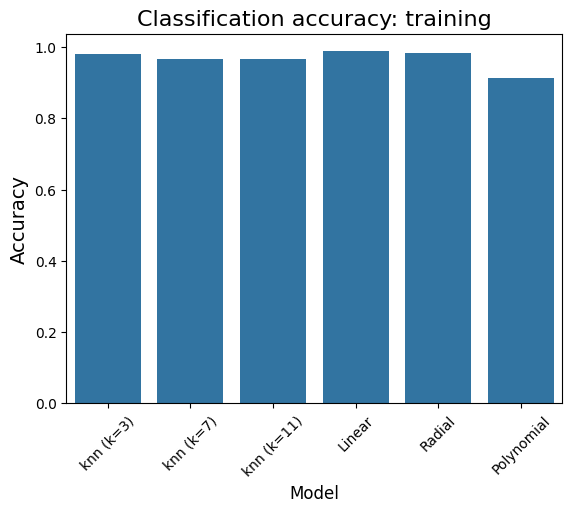

In [8]:
# Plot scores on training for all models
model = ['knn (k=3)', 'knn (k=7)', 'knn (k=11)', 'Linear', 'Radial', 'Polynomial']

p = sns.barplot(x=model, y=train_scores)
p.set_xlabel('Model', fontsize=12)
plt.xticks(rotation=45)
p.set_ylabel('Accuracy', fontsize=14)
p.set_title('Classification accuracy: training', fontsize=16)
plt.show()

In [9]:
# Calculate scores on testing for all models
test_scores = [
    knn3.score(X_test_scaled, y_test),
    knn7.score(X_test_scaled, y_test),
    knn11.score(X_test_scaled, y_test),
    linearSVM.score(X_test_scaled, y_test),
    rbfSVM.score(X_test_scaled, y_test),
    polySVM.score(X_test_scaled, y_test),
]

test_scores

[0.9883040935672515,
 0.9766081871345029,
 0.9824561403508771,
 0.9883040935672515,
 0.9824561403508771,
 0.8771929824561403]

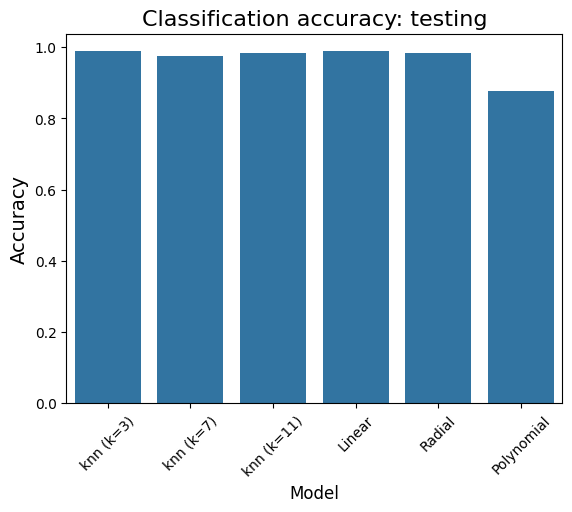

In [10]:
# Plot scores on testing for all models
p = sns.barplot(x=model, y=test_scores)
p.set_xlabel('Model', fontsize=12)
plt.xticks(rotation=45)
p.set_ylabel('Accuracy', fontsize=14)
p.set_title('Classification accuracy: testing', fontsize=16)
plt.show()

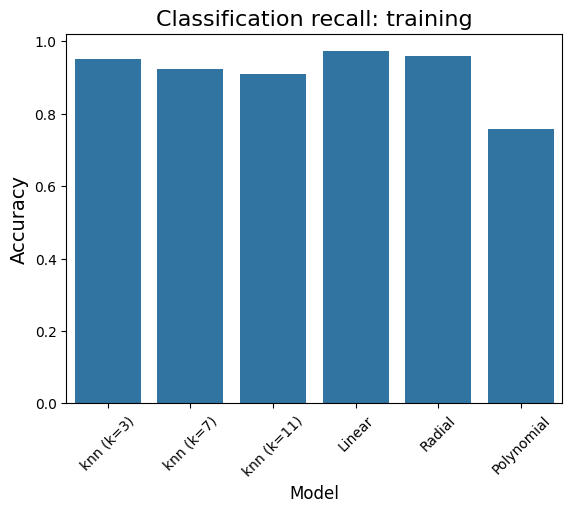

In [11]:
# Calculate recall on training for all models
train_recall = [
    recall_score(y_train, knn3.predict(X_train_scaled)),
    recall_score(y_train, knn7.predict(X_train_scaled)),
    recall_score(y_train, knn11.predict(X_train_scaled)),
    recall_score(y_train, linearSVM.predict(X_train_scaled)),
    recall_score(y_train, rbfSVM.predict(X_train_scaled)),
    recall_score(y_train, polySVM.predict(X_train_scaled)),
]

p = sns.barplot(x=model, y=train_recall)
p.set_xlabel('Model', fontsize=12)
plt.xticks(rotation=45)
p.set_ylabel('Accuracy', fontsize=14)
p.set_title('Classification recall: training', fontsize=16)
plt.show()

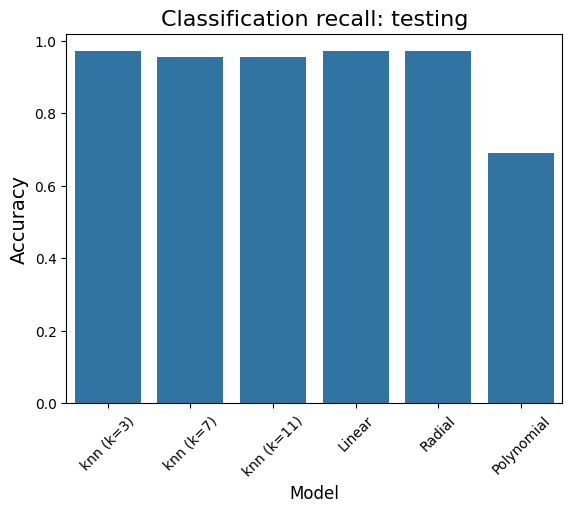

In [12]:
# Calculate recall on testing for all models
test_recall = [
    recall_score(y_test, knn3.predict(X_test_scaled)),
    recall_score(y_test, knn7.predict(X_test_scaled)),
    recall_score(y_test, knn11.predict(X_test_scaled)),
    recall_score(y_test, linearSVM.predict(X_test_scaled)),
    recall_score(y_test, rbfSVM.predict(X_test_scaled)),
    recall_score(y_test, polySVM.predict(X_test_scaled)),
]

p = sns.barplot(x=model, y=test_recall)
p.set_xlabel('Model', fontsize=12)
plt.xticks(rotation=45)
p.set_ylabel('Accuracy', fontsize=14)
p.set_title('Classification recall: testing', fontsize=16)
plt.show()

In [13]:
test_recall

[np.float64(0.9705882352941176),
 np.float64(0.9558823529411765),
 np.float64(0.9558823529411765),
 np.float64(0.9705882352941176),
 np.float64(0.9705882352941176),
 np.float64(0.6911764705882353)]